In [1]:
import numpy as np
from numpy import pi
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

In [2]:
from qiskit import *
import qiskit

In [3]:
phi_plus = np.array([1, 0, 0, 1])/np.sqrt(2)   # | Phi^+ >
phi_minus = np.array([1, 0, 0, -1])/np.sqrt(2) # | Phi^- >
psi_plus = np.array([0, 1, 1, 0])/np.sqrt(2)   # | Psi^+ >
psi_minus = np.array([0, 1, -1, 0])/np.sqrt(2) # | Psi^- >

print(np.outer(phi_plus, phi_plus))
print(np.outer(phi_minus, phi_minus))
print(np.outer(psi_plus, psi_plus))
print(np.outer(psi_minus, psi_minus))

p_x = np.array([[0, 1], [1, 0]])
p_y = np.array([[0, -1j], [1j, 0]])
p_z = np.array([[1, 0], [0, -1]])

p_x_2 = qiskit.circuit.library.RXGate(np.pi/2).to_matrix()
p_y_2 = qiskit.circuit.library.RYGate(np.pi/2).to_matrix()
p_z_2 = qiskit.circuit.library.RZGate(np.pi/2).to_matrix()

[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
[[ 0.5  0.   0.  -0.5]
 [ 0.   0.   0.  -0. ]
 [ 0.   0.   0.  -0. ]
 [-0.5 -0.  -0.   0.5]]
[[0.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.  0. ]]
[[ 0.   0.  -0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [-0.  -0.5  0.5 -0. ]
 [ 0.   0.  -0.   0. ]]


## Random mixed state for the initial state, distill entanglement from this state

In [4]:
rand_unitary = qiskit.quantum_info.operators.random.random_unitary([2, 2])
print(rand_unitary.data)

print("------------------------------------")

conj_unitary = np.conj(rand_unitary.data).T
# print(conj_unitary)


print("------------------------------------")

# print(np.isclose(rand_unitary.data @ conj_unitary, np.eye(4)))
# print(np.isclose(conj_unitary @ rand_unitary.data, np.eye(4)))

print("------------------------------------")


init_state = np.outer(np.array([1, 0, 0, 0]), np.array([1, 0, 0, 0]))
#print(init_state)

print("------------------------------------")


print(rand_unitary.data @ init_state @ conj_unitary)

# Fidelity

print(np.trace(rand_unitary.data @ init_state @ conj_unitary @ np.outer(psi_minus, psi_minus)))

[[ 0.22371416-6.94257256e-02j -0.49814694-2.61262116e-01j  0.00757222-2.18573891e-01j -0.76216258+3.06337988e-04j]
 [ 0.03006978+2.48618172e-01j -0.41190676-7.77327718e-02j -0.01342971+8.71941928e-01j  0.03185252-9.87830662e-03j]
 [-0.90651181+7.25636266e-05j  0.05423868-1.06674297e-02j  0.2643879 +7.17449630e-02j -0.31582494+1.96726551e-02j]
 [ 0.1030922 +2.23663111e-01j  0.35765916+6.13927089e-01j -0.29836915+1.66230514e-01j -0.48507824-2.87337155e-01j]]
------------------------------------
------------------------------------
------------------------------------
------------------------------------
[[ 0.05486796+0.j         -0.01053346-0.05770702j -0.20280457+0.06291901j  0.00753521-0.05719386j]
 [-0.01053346+0.05770702j  0.06271519+0.j         -0.02724057-0.22537749j  0.05870667+0.01890509j]
 [-0.20280457-0.06291901j -0.02724057+0.22537749j  0.82176367+0.j         -0.09343806+0.20276073j]
 [ 0.00753521+0.05719386j  0.05870667-0.01890509j -0.09343806-0.20276073j  0.06065319+0.j     

In [5]:
print(qiskit.circuit.library.RXGate(np.pi/2).to_matrix())
xgate = qiskit.circuit.library.RXGate(np.pi/2).to_matrix()
print(xgate @ xgate/-1j)
print(qiskit.circuit.library.XGate().to_matrix())


[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]
[[-0.+2.22044605e-16j  1.+0.00000000e+00j]
 [ 1.+0.00000000e+00j -0.+2.22044605e-16j]]
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


## Depolarize to Werner form

In [6]:
M_state = rand_unitary.data @ init_state @ conj_unitary

B_x = np.kron(p_x, p_x)
print(B_x)
B_y = np.kron(p_y, p_y)
print(B_y)
B_z = np.kron(p_z, p_z)
print(B_z)

MF_state = 0.25*M_state + 0.25*(B_x @ M_state @ B_x + B_y @ M_state @ B_y + B_z @ M_state @ B_z)
print(MF_state)

psi_minus_density = np.outer(psi_minus, psi_minus)
psi_plus_density = np.outer(psi_plus, psi_plus)
phi_minus_density = np.outer(phi_minus, phi_minus)
phi_plus_density = np.outer(phi_plus, phi_plus)

print(np.trace(psi_minus_density @ MF_state))

print(np.trace(psi_minus_density @ MF_state)*psi_minus_density + np.trace(psi_plus_density @ MF_state)*psi_plus_density + 
      np.trace(phi_minus_density @ MF_state)*phi_minus_density + np.trace(phi_plus_density @ MF_state)*phi_plus_density)

[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
[[ 0.+0.j  0.-0.j  0.-0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j  0.-0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.-0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]
[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]
[[ 0.05776057+0.j  0.        +0.j  0.        +0.j  0.00753521+0.j]
 [ 0.        +0.j  0.44223943+0.j -0.02724057+0.j  0.        +0.j]
 [ 0.        +0.j -0.02724057+0.j  0.44223943+0.j  0.        +0.j]
 [ 0.00753521+0.j  0.        +0.j  0.        +0.j  0.05776057+0.j]]
(0.4694799933722479+0j)
[[ 0.05776057+0.j  0.        +0.j  0.        +0.j  0.00753521+0.j]
 [ 0.        +0.j  0.44223943+0.j -0.02724057+0.j  0.        +0.j]
 [ 0.        +0.j -0.02724057+0.j  0.44223943+0.j  0.        +0.j]
 [ 0.00753521+0.j  0.        +0.j  0.        +0.j  0.05776057+0.j]]


In [7]:
B_x = np.kron(p_x_2, p_x_2)
#print(B_x)
B_y = np.kron(p_y_2, p_y_2)
#print(B_y)
B_z = np.kron(p_z_2, p_z_2)
#print(B_z)

print(psi_plus_density)
print(B_x @ psi_plus_density @ np.conj(B_x).T)
print("----------------------------------------")

print(phi_minus_density)
print(B_x @ phi_minus_density @ np.conj(B_x).T)
print("----------------------------------------")

print(phi_plus_density)
print(B_x @ phi_plus_density @ np.conj(B_x).T)
print("----------------------------------------")



[[0.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.  0. ]]
[[5.00000000e-01+0.00000000e+00j 0.00000000e+00-1.11022302e-16j 0.00000000e+00-1.11022302e-16j 5.00000000e-01+0.00000000e+00j]
 [0.00000000e+00+1.11022302e-16j 1.84889275e-32+0.00000000e+00j 2.46519033e-32+0.00000000e+00j 0.00000000e+00+1.11022302e-16j]
 [0.00000000e+00+1.11022302e-16j 1.84889275e-32+0.00000000e+00j 2.46519033e-32+0.00000000e+00j 0.00000000e+00+1.11022302e-16j]
 [5.00000000e-01+0.00000000e+00j 0.00000000e+00-1.11022302e-16j 0.00000000e+00-1.11022302e-16j 5.00000000e-01+0.00000000e+00j]]
----------------------------------------
[[ 0.5  0.   0.  -0.5]
 [ 0.   0.   0.  -0. ]
 [ 0.   0.   0.  -0. ]
 [-0.5 -0.  -0.   0.5]]
[[ 0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j  0.5+0.j]]
----------------------------------------
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
[[1.8

In [8]:
print(psi_plus_density)
print(B_y @ psi_plus_density @ np.conj(B_y).T)
print("----------------------------------------")

print(phi_minus_density)
print(B_y @ phi_minus_density @ np.conj(B_y).T)
print("----------------------------------------")

print(phi_plus_density)
print(B_y @ phi_plus_density @ np.conj(B_y).T)
print("----------------------------------------")

[[0.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.  0. ]]
[[ 5.00000000e-01+0.j -1.11022302e-16+0.j -1.11022302e-16+0.j -5.00000000e-01+0.j]
 [-1.11022302e-16+0.j  1.84889275e-32+0.j  2.46519033e-32+0.j  1.11022302e-16+0.j]
 [-1.11022302e-16+0.j  1.84889275e-32+0.j  2.46519033e-32+0.j  1.11022302e-16+0.j]
 [-5.00000000e-01+0.j  1.11022302e-16+0.j  1.11022302e-16+0.j  5.00000000e-01+0.j]]
----------------------------------------
[[ 0.5  0.   0.  -0.5]
 [ 0.   0.   0.  -0. ]
 [ 0.   0.   0.  -0. ]
 [-0.5 -0.  -0.   0.5]]
[[ 1.84889275e-32+0.j  1.11022302e-16+0.j  1.11022302e-16+0.j -2.46519033e-32+0.j]
 [ 1.11022302e-16+0.j  5.00000000e-01+0.j  5.00000000e-01+0.j -1.11022302e-16+0.j]
 [ 1.11022302e-16+0.j  5.00000000e-01+0.j  5.00000000e-01+0.j -1.11022302e-16+0.j]
 [-1.84889275e-32+0.j -1.11022302e-16+0.j -1.11022302e-16+0.j  2.46519033e-32+0.j]]
----------------------------------------
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
[[0.5

In [9]:
print(psi_plus_density)
print(B_z @ psi_plus_density @ np.conj(B_z).T)
print("----------------------------------------")

print(phi_minus_density)
print(B_z @ phi_minus_density @ np.conj(B_z).T)
print("----------------------------------------")

print(phi_plus_density)
print(B_z @ phi_plus_density @ np.conj(B_z).T)
print("----------------------------------------")

[[0.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.  0. ]]
[[0. +0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j]
 [0. +0.00000000e+00j 0.5+0.00000000e+00j 0.5-1.01465364e-17j 0. +0.00000000e+00j]
 [0. +0.00000000e+00j 0.5+1.01465364e-17j 0.5+0.00000000e+00j 0. +0.00000000e+00j]
 [0. +0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j]]
----------------------------------------
[[ 0.5  0.   0.  -0.5]
 [ 0.   0.   0.  -0. ]
 [ 0.   0.   0.  -0. ]
 [-0.5 -0.  -0.   0.5]]
[[0.5+0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j 0.5+1.79380389e-16j]
 [0. +0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j]
 [0. +0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j 0. +0.00000000e+00j]
 [0.5-1.79380389e-16j 0. +0.00000000e+00j 0. +0.00000000e+00j 0.5+0.00000000e+00j]]
----------------------------------------
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
[[ 0.

In [10]:
M_state = rand_unitary.data @ init_state @ conj_unitary

B_x = np.kron(p_x_2, p_x_2)
#print(B_x)
B_y = np.kron(p_y_2, p_y_2)
#print(B_y)
B_z = np.kron(p_z_2, p_z_2)
#print(B_z)

MF_state = 0.25*M_state + 0.25*(B_x @ M_state @ B_x + B_y @ M_state @ B_y + B_z @ M_state @ B_z)
for row in MF_state:
    print(row)
    
psi_minus_density = np.outer(psi_minus, psi_minus)
psi_plus_density = np.outer(psi_plus, psi_plus)
phi_minus_density = np.outer(phi_minus, phi_minus)
phi_plus_density = np.outer(phi_plus, phi_plus)

print(np.trace(psi_minus_density @ MF_state))

print(np.trace(psi_minus_density @ MF_state)*psi_minus_density + np.trace(psi_plus_density @ MF_state)*psi_plus_density + 
      np.trace(phi_minus_density @ MF_state)*phi_minus_density + np.trace(phi_plus_density @ MF_state)*phi_plus_density)

[-0.08930957-0.0047309j   0.08014025-0.04209918j -0.13706423+0.02774492j  0.06501981-0.02859693j]
[-0.02865636+0.07232729j  0.13428745-0.08111219j -0.15834992-0.11268875j  0.06739328+0.0638714j ]
[-0.00372299+0.02154537j -0.13251093+0.11268875j  0.51381169+0.08111219j -0.09317969-0.0334624j ]
[-0.053717  +0.02859693j  0.05333075+0.10168576j  0.06175898-0.17950368j -0.08930957+0.0047309j ]
(0.46947999337224783-1.3877787807814457e-17j)
[[-0.08930957+1.47451495e-17j  0.        +0.00000000e+00j  0.        +0.00000000e+00j  0.00565141+8.67361738e-19j]
 [ 0.        +0.00000000e+00j  0.32404957+5.20417043e-18j -0.14543042+1.90819582e-17j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.14543042+1.90819582e-17j  0.32404957+5.20417043e-18j  0.        +0.00000000e+00j]
 [ 0.00565141+8.67361738e-19j  0.        +0.00000000e+00j  0.        +0.00000000e+00j -0.08930957+1.47451495e-17j]]


In [157]:
K1 = np.kron(p_x, p_z)
print(K1)
K2 = np.kron(p_z, p_x)
print(K2)
K3 = np.kron(p_x @ p_z, p_z @ p_x)
print(K3)

MF_state = 0.25*M_state + 0.25*(K1 @ M_state @ K1.conj().T + K2 @ M_state @ K2.conj().T + K3 @ M_state @ K3.conj().T)
for row in MF_state:
    print(row)
    
psi_minus_density = np.outer(psi_minus, psi_minus)
psi_plus_density = np.outer(psi_plus, psi_plus)
phi_minus_density = np.outer(phi_minus, phi_minus)
phi_plus_density = np.outer(phi_plus, phi_plus)

print(np.trace(psi_minus_density @ MF_state))

print(np.trace(psi_minus_density @ MF_state)*psi_minus_density + np.trace(psi_plus_density @ MF_state)*psi_plus_density + 
      np.trace(phi_minus_density @ MF_state)*phi_minus_density + np.trace(phi_plus_density @ MF_state)*phi_plus_density)

[[ 0  0  1  0]
 [ 0  0  0 -1]
 [ 1  0  0  0]
 [ 0 -1  0  0]]
[[ 0  1  0  0]
 [ 1  0  0  0]
 [ 0  0  0 -1]
 [ 0  0 -1  0]]
[[ 0  0  0 -1]
 [ 0  0  1  0]
 [ 0  1  0  0]
 [-1  0  0  0]]
[ 0.25      +0.0000000e+00j  0.086575  +0.0000000e+00j -0.02064807-6.9388939e-18j  0.16563663+0.0000000e+00j]
[ 0.086575  +0.0000000e+00j  0.25      +0.0000000e+00j -0.16563663+0.0000000e+00j  0.02064807-6.9388939e-18j]
[-0.02064807+6.9388939e-18j -0.16563663+0.0000000e+00j  0.25      +0.0000000e+00j -0.086575  +0.0000000e+00j]
[ 0.16563663+0.0000000e+00j  0.02064807+6.9388939e-18j -0.086575  +0.0000000e+00j  0.25      +0.0000000e+00j]
(0.4156366318081718+0j)
[[ 0.25      +0.j  0.        +0.j  0.        +0.j  0.16563663+0.j]
 [ 0.        +0.j  0.25      +0.j -0.16563663+0.j  0.        +0.j]
 [ 0.        +0.j -0.16563663+0.j  0.25      +0.j  0.        +0.j]
 [ 0.16563663+0.j  0.        +0.j  0.        +0.j  0.25      +0.j]]


In [33]:
K0 = np.eye(4)

pxs = qiskit.circuit.library.RXGate(np.pi/2).to_matrix()
pys = qiskit.circuit.library.RYGate(np.pi/2).to_matrix()
pzs = qiskit.circuit.library.RZGate(np.pi/2).to_matrix()

K0 = np.eye(4)
K1 = np.kron(pxs, pxs)
print(K1.round(15))

K2 = np.kron(pys, pys)
print(K2.round(15))

K3 = np.kron(pzs, pzs)
K4 = np.kron(pxs @ pys, pxs @ pys)
K5 = np.kron(pys @ pzs, pys @ pzs)
K6 = np.kron(pzs @ pxs, pzs @ pxs)
K7 = np.kron(pys @ pxs, pys @ pxs)
K8 = np.kron(pxs @ pys @ pxs @ pys, pxs @ pys @ pxs @ pys)
K9 = np.kron(pys @ pzs @ pys @ pzs, pys @ pzs @ pys @ pzs)
K10 = np.kron(pzs @ pxs @ pzs @ pxs, pzs @ pxs @ pzs @ pxs)
K11 = np.kron(pys @ pxs @ pys @ pxs, pys @ pxs @ pys @ pxs)

K_list = [K0, K1, K2, K3, K4, K5, K6, K7, K8, K9, K10, K11]

MF_state = np.zeros((4,4), dtype=complex)
for operator in K_list:
    MF_state +=  1/12 * operator @ M_state @ operator.conj().T
for row in MF_state.round(15):
    print(row)


[[ 0.5+0.j   0. -0.5j  0. -0.5j -0.5-0.j ]
 [ 0. -0.5j  0.5+0.j  -0.5-0.j   0. -0.5j]
 [ 0. -0.5j -0.5-0.j   0.5+0.j   0. -0.5j]
 [-0.5-0.j   0. -0.5j  0. -0.5j  0.5+0.j ]]
[[ 0.5+0.j -0.5+0.j -0.5+0.j  0.5-0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]]
[ 0.1674318 +0.j          0.01420363+0.01494441j -0.02260377+0.08832782j -0.0018838 -0.01961479j]
[ 0.01420363-0.01494441j  0.23636787-0.j         -0.17608985-0.00719767j -0.11747278+0.01721839j]
[-0.02260377-0.08832782j -0.17608985+0.00719767j  0.35041241+0.j          0.02636226+0.02116671j]
[-0.0018838 +0.01961479j -0.11747278-0.01721839j  0.02636226-0.02116671j  0.24578791+0.j        ]


"""elif rot_idx == 1:
    circuit.rx(pi/2, qubit)
    circuit.rx(pi/2, qubit)
    
elif rot_idx == 2:
    circuit.ry(pi/2, qubit)
    circuit.ry(pi/2, qubit)
    
elif rot_idx == 3:
    circuit.rz(pi/2, qubit)
    circuit.rz(pi/2, qubit)
    
elif rot_idx == 4:
    circuit.rx(pi/2, qubit)
    circuit.ry(pi/2, qubit)
    
elif rot_idx == 5:
    circuit.ry(pi/2, qubit)
    circuit.rz(pi/2, qubit)
    
elif rot_idx == 6:
    circuit.rz(pi/2, qubit)
    circuit.rx(pi/2, qubit)
    
elif rot_idx == 7:
    circuit.ry(pi/2, qubit)
    circuit.rx(pi/2, qubit)
    
elif rot_idx == 8:
    circuit.rx(pi/2, qubit)
    circuit.ry(pi/2, qubit)
    circuit.rx(pi/2, qubit)
    circuit.ry(pi/2, qubit)
    
elif rot_idx == 9:
    circuit.ry(pi/2, qubit)
    circuit.rz(pi/2, qubit)
    circuit.ry(pi/2, qubit)
    circuit.rz(pi/2, qubit)
    
elif rot_idx == 10:
    circuit.rz(pi/2, qubit)
    circuit.rx(pi/2, qubit)
    circuit.rz(pi/2, qubit)
    circuit.rx(pi/2, qubit)
    
elif rot_idx == 11:
    circuit.ry(pi/2, qubit)
    circuit.rx(pi/2, qubit)
    circuit.ry(pi/2, qubit)
    circuit.rx(pi/2, qubit)"""

In [18]:
# Create a parameter theta
#theta = Parameter('theta')
theta = pi/2


# Define circuit

In [14]:
qc = QuantumCircuit(4)

qc.x(1)
qc.x(3)

qc.u(theta, pi, 0, 0)
qc.u(theta, pi, 0, 2)

qc.cx(0, 1)
qc.cx(2, 3)


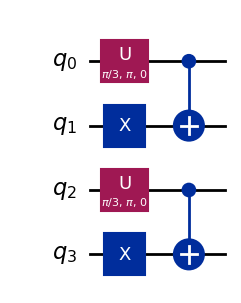

In [15]:
qc.draw(output='mpl')